### ETAS: Japan 2016
#### 22 November 2016, m=6.9
Time: 2016-11-21 20:59:49 (UTC)

Location:
37.392°N 141.403°E

Depth
11.3 km


In [1]:
#
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import datetime as dtm
import matplotlib.dates as mpd
import pytz
tzutc = pytz.timezone('UTC')

#import operator
import math
import random
import numpy
import scipy
import scipy.optimize as spo
from scipy import interpolate
import itertools
import sys
#import scipy.optimize as spo
import os
import operator
#from PIL import Image as ipp
import multiprocessing as mpp
#
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import json
import pickle
#
import geopy.distance
#from geopy.distance import vincenty
#from geopy.distance import great_circle
#
#import shapely.geometry as sgp
#
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from geographiclib.geodesic import Geodesic as ggp
#
#import ANSStools as atp
from yodiipy import ANSStools as atp
#
import contours2kml
import globalETAS as gep
import global_etas_auto as ggep
from eq_params import *
#
from nepal_figs import *
import optimizers
#
import random
import geopy



failed while loading urllib and/or urllib. maybe python 3.x?


/home/myoder/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
# event was some time on the 24th or maybe late the 23rd. this, plus defaults, should find the event:
#to_dt = dtm.datetime(2016,8,25, tzinfo=pytz.timezone('UTC'))
to_dt = dtm.datetime.now(pytz.timezone('UTC'))
#
Lr_factor = 10.
# define these from the t_now in the actual etas object, in the event that we load it from pickle,
#  rather than calc it here.
#f_path = '/home/myoder/Dropbox/Research/etas/italy_2016_10/etas_{}'.format(to_dt)
#f_root = 'etas_2016'
#
# USGS:
# Time
# 2016-11-21 20:59:49 (UTC)
# Location
# 37.392°N 141.403°E
# Depth
# 11.3 km

t0 = dtm.datetime(2016, 11, 21, 20, 59, 49, tzinfo=pytz.timezone('UTC'))
t_ms = t0
to_dt = dtm.datetime.now(pytz.utc)
#Location
lat0 = 37.392
lon0 = 141.403
m0 = 6.9
d_lat=4.
d_lon=4.
lats = [lat0-d_lat, lat0+d_lat]
lons = [lon0-d_lon, lon0+d_lon]
event_name = 'SSA_dev'
#to_dt = t0-dtm.timedelta(hours=2)
#to_dt = dtm.datetime.now(pytz.utc)
#
#etas = ggep.auto_etas(to_dt=to_dt, Lr_factor=Lr_factor, dt_0=5)
#italy_prams = {'do_recarray': True, 'D_fract': 1.5,
#                't_0':dtm.datetime(1990, 1, 1, 0, 0, tzinfo=pytz.timezone('UTC')),
#                't_now':to_dt, 
#                'lats': [42.,43.5], 'p': 1.1, 'b1': 1.0, 'mc': 2.5, 'q': 1.5,
#                'lons': [12.,15.], 'dmstar': 1.0, 'b2': 1.5, 'd_tau': 2.28,
#                'incat': None, 'fit_factor': 2.0, 'd_lambda': 1.76}
eq_prams = {'do_recarray': True, 'D_fract': 1.5,
               't_0':dtm.datetime(1990, 1, 1, 0, 0, tzinfo=pytz.timezone('UTC')),
               't_now':to_dt, 
               'lats': lats, 'p': 1.1, 'b1': 1.0, 'mc': 2.5, 'q': 1.5,
               'lons': lons, 'dmstar': 1.0, 'b2': 1.5, 'd_tau': 2.28,
               'incat': None, 'fit_factor': 2.0, 'd_lambda': 1.76, 'etas_range_padding':.5*(d_lat+d_lon)}

In [4]:
#nz_cat0 = test_cat = atp.cat_from_geonet(lats=lats, lons=lons, m_c=2.5, date_from=dtm.datetime(2000,1,1,tzinfo=atp.tzutc),
#                              date_to=dtm.datetime.now(atp.tzutc))
#nz_cat = gep.make_ETAS_catalog_mpp(incat=nz_cat0)

#etas = gep.ETAS_mpp(n_cpu=2*mpp.cpu_count(), catalog=None, **eq_prams)
#
# we've run this; we can reload it from pickle:
f_pkl = '/home/myoder/Dropbox/Research/etas/ElSalvador_2016_11/etas_2016-11-25 14:56:56.873292+00:00/\
etas_ElSlavador_2016_11_2016-11-25_14:56:56.873292+00:00.pkl'
with open(f_pkl, 'rb') as fin:
    etas=pickle.load(fin)
#
lats = etas.lats
lons = etas.lons
#
# TODO: do this with os.path.join() for win, etc. compatibility.
f_path = '/home/myoder/Dropbox/Research/etas/{}/etas_{}'.format(event_name,etas.t_now)
f_root = 'etas_japan_2016_11'

In [5]:
#print(etas.t0, etas.t_now, etas.t_forecast, etas.catalog[-1])
print(to_dt)
print(etas.t_0, mpd.num2date(etas.t_forecast), etas.t_now, t_ms)
#print(etas.catalog[-5:])

2016-12-01 05:40:46.474218+00:00
1990-01-01 00:00:00+00:00 2016-11-25 14:56:56.873292+00:00 2016-11-25 14:56:56.873292+00:00 2016-11-21 20:59:49+00:00


ms:  (datetime.datetime(2016, 11, 24, 18, 43, 48, 830000), 11.9597, -88.8355, 7.0, 10.34, 736292.7804262731, 54.954087385762456, 997.8404925454946, 2.0021630113650087e-05, 16.595869074375614, 126.65018464658773, 0.0019486750167964611, 1.0, 1.1, 1.5, array([  9.37379299e+07,   6.75770119e+02]), array([[ 0.99031059,  0.13887025],
       [-0.13887025,  0.99031059]]), 175.0) -88.8355 11.9597


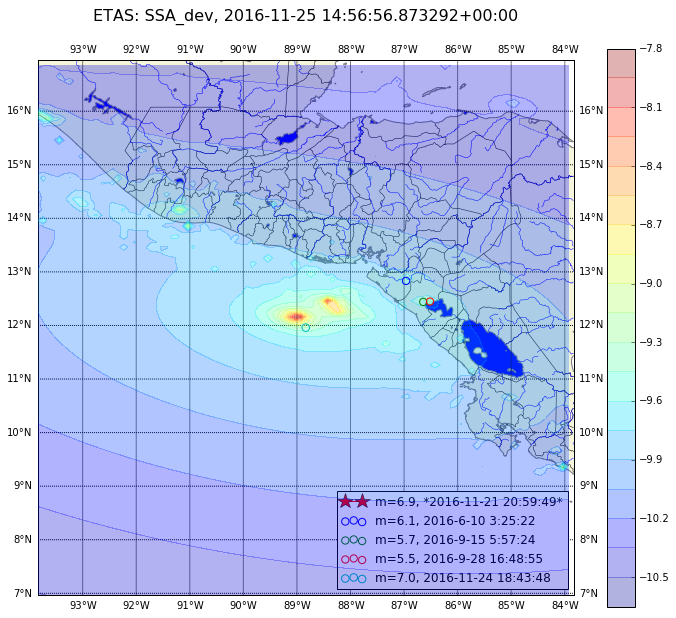

In [6]:
fg=plt.figure(0, figsize=(12,10))
ax=plt.gca()
etas.make_etas_contour_map(n_contours=25, fignum=0, map_resolution='f', alpha=.3, ax=ax)
#
#mainshock = sorted(etas.catalog, key=lambda rw: rw['mag'])[-1]
#print('mainshock: ', mainshock)
# get mainshock. it's an m>6 event in the last week or so... this is subjective.
# if we just look for the biggest event, we get the L'Aquila event, so we'll need to be more creative...
# or just specify it.

mainshock = etas.catalog[-1]
for j,eq in enumerate(reversed(etas.catalog)):
    #print('*** ', pytz.utc.localize(eq['event_date'].astype(dtm.datetime)))
    if pytz.utc.localize(eq['event_date'].astype(dtm.datetime))<etas.t_now-dtm.timedelta(days=180): break
    if eq['mag']>mainshock['mag']:
        mainshock = eq
        #
    #
#
print('ms: ', mainshock, mainshock['lon'], mainshock['lat'])
x,y = etas.cm(mainshock['lon'], mainshock['lat'])

#print('mm: ', max(etas.catalog['mag']))


#
# let's get everything m>6 in the last 6 months?
m6s = [rw for rw in etas.catalog if rw['mag'] >= 5.5
       and pytz.utc.localize(rw['event_date'].astype(dtm.datetime))>t_ms-dtm.timedelta(days=180)]

# plot mainshock:
dt = mainshock['event_date'].astype(dtm.datetime)
dt=t0
dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
#etas.cm.plot([x], [y], latlon=False, marker='*', color='r', ms=16, zorder=11,
#                   label='m={}, {}'.format(mainshock['mag'], dt_str))
etas.cm.plot([lon0], [lat0], latlon=False, marker='*', color='r', ms=16, zorder=11,
                   label='m={}, *{}*'.format(m0, dt_str))

ax.set_title('ETAS: {}, {}\n\n'.format(event_name, etas.t_now), size=16)
for j,m6 in enumerate(m6s):
    clr = colors_[j%len(colors_)]
    #
    dt = m6['event_date'].astype(dtm.datetime)
    dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    etas.cm.scatter(m6['lon'], m6['lat'], s=3*(m6['mag']+12.), edgecolors=clr, 
                          c='none', marker='o', zorder=11, label='m={}, {}'.format(m6['mag'], dt_str))
    #
plt.gca().legend(loc='lower right')

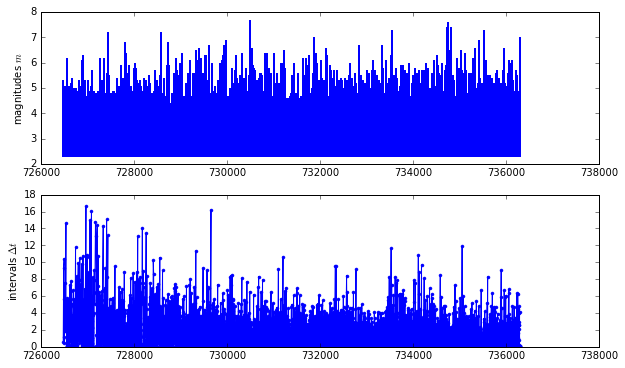

In [7]:
plt.figure(figsize=(10,6))
plt.clf()
ax1 = plt.subplot('211')
ax2 = plt.subplot('212', sharex=ax1)
#ax1.plot(etas.catalog['event_date'], etas.catalog['mag'], marker='.', ls='-', label='mag')
f_dates = [mpd.date2num(x.astype(dtm.datetime)) for x in etas.catalog['event_date']]
ax1.vlines(f_dates, (min(etas.catalog['mag'])-.5)*numpy.ones(len(etas.catalog)), 
           etas.catalog['mag'], lw=2., label='mag', color='b')
ax2.plot(f_dates[1:], numpy.diff(f_dates,1), '.-')

ax2.set_ylabel('intervals $\Delta t$')
ax1.set_ylabel('magnitudes $m$')

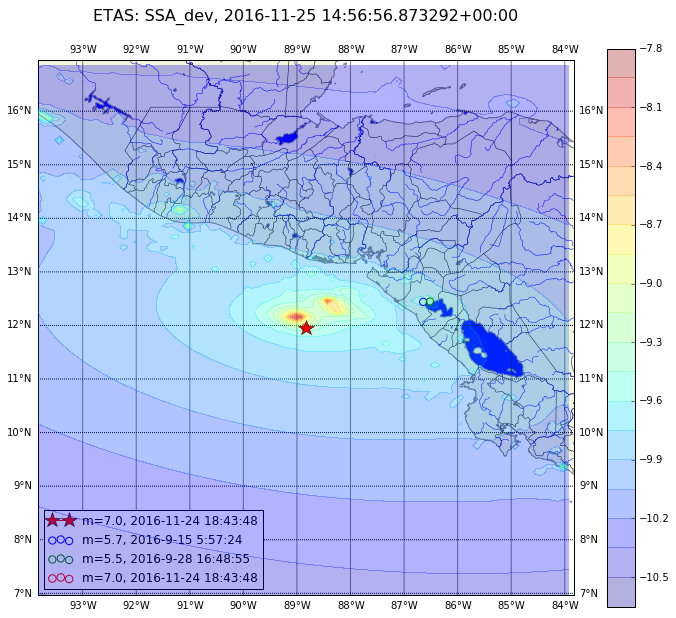

In [8]:
fg=plt.figure(0, figsize=(12,10))
ax=plt.gca()
etas.make_etas_contour_map(n_contours=25, fignum=0, map_resolution='f', alpha=.3, ax=ax)

#
# let's get everything m>6 in the last 6 months?
m6s = [rw for rw in etas.catalog if rw['mag'] >= 5.5 
       and pytz.utc.localize(rw['event_date'].astype(dtm.datetime))>to_dt-dtm.timedelta(days=120)]
#
# plot mainshock:
dt = mainshock['event_date'].astype(dtm.datetime)
etas.cm.plot([x], [y], latlon=False, marker='*', color='r', ms=16, zorder=11,
                   label='m={}, {}'.format(mainshock['mag'], dt_str))
ax.set_title('ETAS: {}, {}\n\n'.format(event_name, etas.t_now), size=16)
for j,m6 in enumerate(m6s):
    clr = colors_[j%len(colors_)]
    #
    dt = m6['event_date'].astype(dtm.datetime)
    dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    etas.cm.scatter(m6['lon'], m6['lat'], s=3*(m6['mag']+12.), edgecolors=clr, 
                          c='none', marker='o', zorder=11, label='m={}, {}'.format(m6['mag'], dt_str))
    #
plt.gca().legend(loc=0)

In [9]:
## hey, pickling works with the new ETAS objects (or at least it appears to...):
# with open('data/etas_201610.pkl', 'wb') as fpkl:
#     pickle.dump( etas, fpkl)    
#
#with open('data/etas_201610.pkl', 'rb') as fin:
#    etas2 = pickle.load(fin)
#
#print(etas2.catalog[0:5])
# TODO: we want the datetime part of the filename to come from the etas object itself, for purposes of
# integrity. BUT, we want this script to be a bit more portable, so we should replace all the etas
# references/object name to just 'etas'
#

# etas.export_kml(os.path.join(f_path, '{}_{}.kml'.format(f_root, str(etas.t_now).replace(' ', '_'))))
# etas.export_xyz(os.path.join(f_path, '{}_{}.xyz'.format(f_root, str(etas.t_now).replace(' ', '_'))))
# fg.savefig(os.path.join(f_path, '{}_{}.png'.format(f_root, str(etas.t_now).replace(' ', '_'))))

# with open (os.path.join(f_path, '{}_{}.pkl'.format(f_root, str(etas.t_now).replace(' ', '_'))), 'wb') as fpkl:
#     pickle.dump(etas, fpkl)


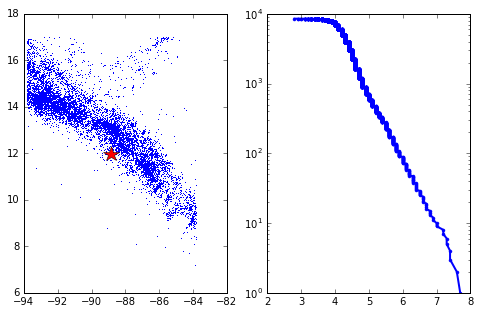

In [10]:
plt.figure(figsize=(8,5))
plt.clf()
ax1=plt.subplot('121')
ax2=plt.subplot('122')
ax1.plot(etas.catalog['lon'], etas.catalog['lat'], ',')
ax1.plot([mainshock['lon']], [mainshock['lat']], marker='*', color='r', ms=16, zorder=11)
#
ax2.plot([m for m in reversed(sorted(etas.catalog['mag']))], numpy.arange(1,len(etas.catalog)+1),
         '.-', lw=2.)
ax2.set_yscale('log')

In [11]:
#print(etas.mc, etas.mc_etas)

In [12]:
# plot a cross-section of ETAS. let's get smart about this and do a PCA on the xyz field...
#
#plt.figure()
##my_xy = [[x,y,z] for x,y in zip(etas.catalog['lon'], etas['lat']) if x>=42.25 and x<=42.75]
#my_xyz = [[x,y,z] for x,y,z in etas.ETAS_array if y>=42.25 and y<=42.75]
#plt.figure(figsize=(8,6))
#plt.plot([x for x,y,z in my_xyz ], [z for x,y,z in my_xyz], '.')

In [13]:
# let's try some spectral analysis? we probalby need to interpolate a bit, but let's see how we go...
#f_pkl = os.path.join(f_path, '{}_{}.xyz'.format(f_root, str(etas.t_now).replace(' ', '_')))
#print('f_pkl: ', f_pkl)
print(len(etas.ETAS_array))

10000


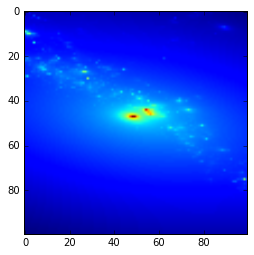

In [61]:
# make an interpolated array, say 100x100?
# here's how to imgshow() an etas array correctly...
# note that reverse() will give origin symmetry, since it is sorted by x,then y (or y, then x)
XYZ = list(zip(*[etas.ETAS_array[cl] for cl in ['x','y','z']]))
XYZ.sort(key=lambda rw: (rw[1], rw[0]))
XYZ.reverse()

X = list(set(etas.ETAS_array['x']))
Y = list(set(etas.ETAS_array['y']))

#Z = numpy.log(etas.ETAS_array['z'].copy())
Z = numpy.log([z for x,y,z in XYZ])

Z.shape=(len(Y), len(X))
Z = numpy.array([list(reversed(list(rw))) for rw in Z])

    
plt.figure()
plt.imshow(Z)

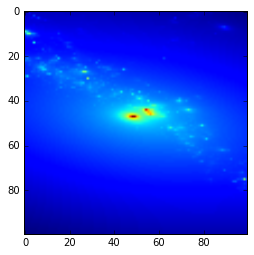

In [62]:
#
from PIL import Image

l=25
from scipy import interpolate
xx, yy = numpy.meshgrid(X, Y)
x_new = numpy.linspace(min(X), max(X),l)
y_new = numpy.linspace(min(Y), max(Y),l)
#
f= interpolate.interp2d(X, Y, Z, kind='linear')
#
zz = f(x_new,y_new)
#sh=zz.shape
zz = Z.copy()
#zz-=min(zz)
#zz/=max(zz)
#
#zz.thumbnail(25,25)
#zz.shape=(zz.size,)
plt.figure()
plt.clf()
plt.imshow(zz)

100
shape:  (100, 100)


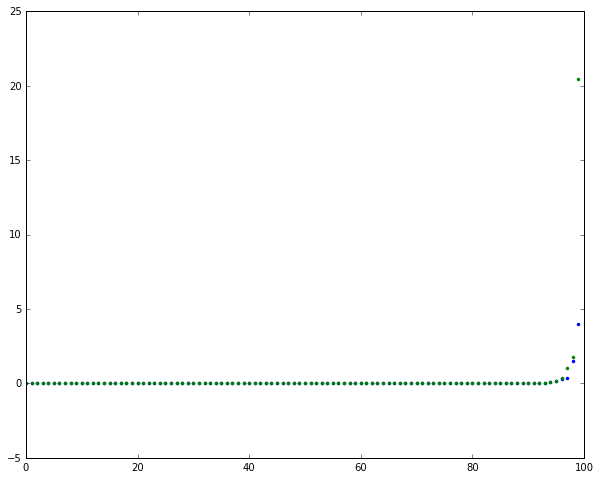

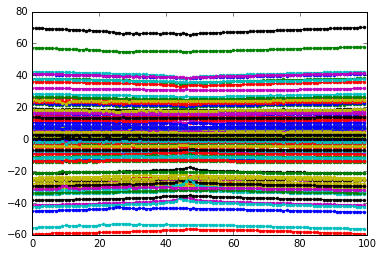

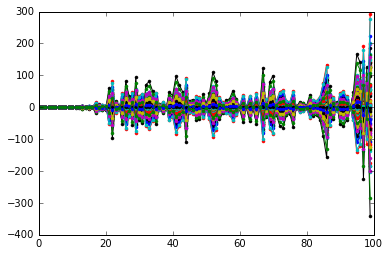

In [88]:
Z_cov = numpy.cov(Z)
Z_cov2 = numpy.cov(Z.T)
print(len(Z_cov))
z_eig_vals, z_eig_vecs = numpy.linalg.eigh(Z_cov)
z_eig_vals2, z_eig_vecs2 = numpy.linalg.eigh(Z_cov2)

#
plt.figure(figsize=(10,8))
plt.clf()
plt.plot(z_eig_vals, '.')
plt.plot(z_eig_vals2, '.')
#
#print(z_eig_vals[-5:])
PCs = numpy.dot(Z, z_eig_vecs.T)
print('shape: ', PCs.shape)

plt.figure()
for pc in PCs.T:
    #plt.figure()
    #plt.imshow(pc)
    #print('sshape: ', pc.shape)
    plt.plot(pc, '.-')
plt.figure()
for pc in PCs.T:
    rc = numpy.dot(pc, z_eig_vecs)
    plt.plot(rc, '.-')

In [15]:
#
#print('size: ', zz.size)
z_lin = numpy.log([z for rw in zz for z in rw])
M = numpy.array([[z1-z2 for k,z2 in enumerate(z_lin)] 
                 for j,z1 in enumerate(z_lin)])
#print('shape: {}'.format(M.shape))
#

In [16]:

cov_M=numpy.cov(M.T)
eig_vals, eig_vecs = numpy.linalg.eigh(cov_M)

In [17]:
print(M.shape)
print(eig_vals[-5:])

(625, 625)
[  6.75983434e-14   8.44793760e-14   1.01031309e-13   1.73280073e-13
   7.86401955e+01]


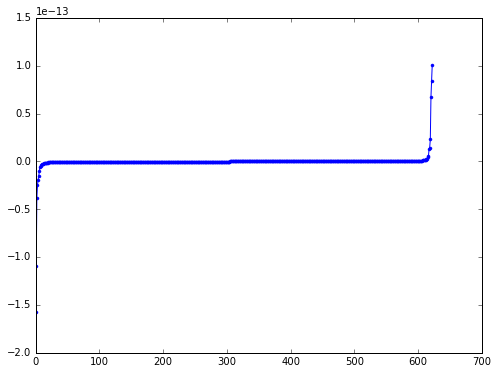

In [18]:
plt.figure(figsize=(8,6))
#plt.plot(eig_vals[100:-100], marker='o')
plt.plot(eig_vals[:-2], marker='.')
#plt.plot([])

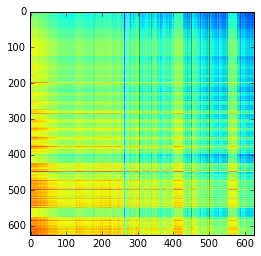

In [19]:
plt.figure()
plt.clf()
plt.imshow(M)

In [20]:
ev_prime = eig_vecs[-10:]

len(ev_prime), len(ev_prime[0])

(10, 625)

In [21]:
PCs = numpy.dot(M.T, ev_prime.T)




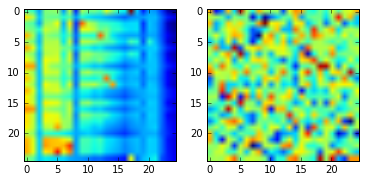

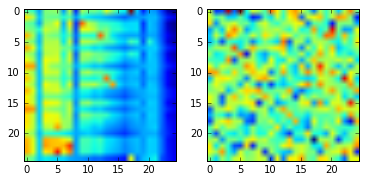

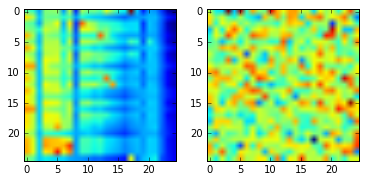

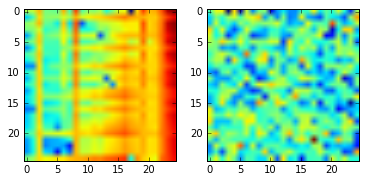

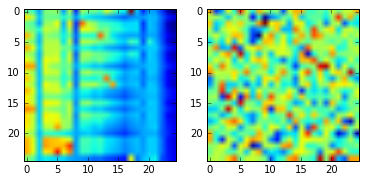

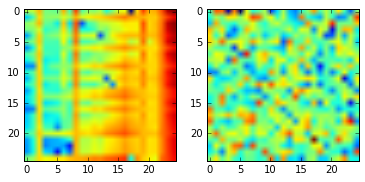

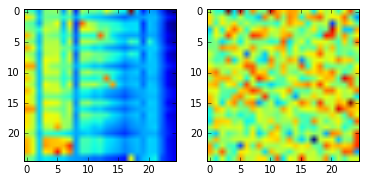

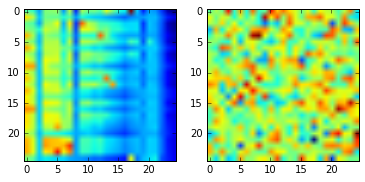

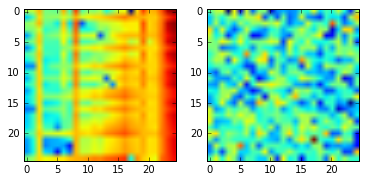

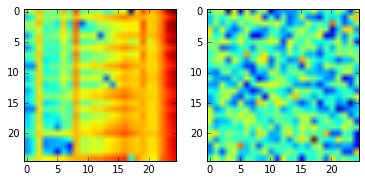

In [22]:
XX0 = numpy.zeros(len(M))
XX  = numpy.zeros(len(M))

for j in range(len(PCs[0])):
    pc = numpy.array([rw[j] for rw in PCs])
    pc_prime = numpy.dot(eig_vecs, pc)

    XX  += pc_prime
    XX0 += pc

    pc.shape=(l,l)
    pc=numpy.array(list(reversed(pc))).T
    #

    pc_prime.shape=(l,l)

    plt.figure()
    ax1 = plt.subplot('121')
    ax2 = plt.subplot('122')
    ax1.imshow(pc)
    #
    
    ax2.imshow(pc_prime)

*****
*****



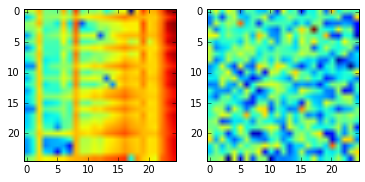

In [23]:
print('*****\n*****\n')
plt.figure()
plt.clf()
ax1 = plt.subplot('121')
ax2 = plt.subplot('122')
#print('len: ', len(XX))
XX.shape=(l,l)
XX0.shape=(l,l)
ax1.imshow(numpy.array(list(reversed(XX0))).T)
ax2.imshow(list(reversed(XX)))

In [85]:
print(z_eig_vecs[0][0:5])
print(z_eig_vecs[2][0:5])
print(z_eig_vecs[5][0:5])

[ 0.  0.  0.  0.  0.]
[  6.07595926e-08   1.83143467e-07  -1.18026563e-07   8.15383210e-06
  -7.46517928e-06]
[  1.16531997e-07  -1.59168107e-06   8.53051324e-07  -7.86867921e-05
  -9.26268950e-06]
